## Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
##### Columns Description-  total 43 columns
- Seat No : The enrolled number of candidate that took the exams
- CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

## Objective: 
Predict - CGPA of a student based on different grades in four years.

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [189]:
# Setting style parameters for graphs
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
#plt.rcParams['figure.facecolor']='#FFE5B4'

## Data Exploration

In [190]:
data=pd.read_csv("Grades.csv")
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [191]:
# Checking the dimension of the dataset
data.shape

(571, 43)

In [192]:
# Checking the types of columns (non-graphical analysis)
# To get good overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

There are missing data in most of the dataset columns.

In [193]:
# Checking the columns of dataset
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [194]:
# Drop seat number column

data.drop("Seat No.",axis=1,inplace=True)

In [195]:
# Rename columns for format XX-XXX consistency

data.rename(columns={'HS-105/12':'HS-105','HS-205/20':'HS-205'},inplace=True)

In [196]:
# Checking null values
data.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

In [197]:
# Checking number of unique values in each column
data.nunique().to_frame("No. of unique values")

,No. of unique values
PH-121,13
HS-101,12
CY-105,13
HS-105,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


In [198]:
data["CS-412"].unique()

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', nan, 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

In [199]:
# Checking the value counts of each column
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
A+     22
D+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
A+    34
D+    34
WU     2
F      1
Name: HS-105, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A

In [200]:
#data.iloc[:,:41]

In [201]:
# Checking unique values per column
for i in data.iloc[:,:41].columns:
    print(data[i].unique())
    print('\n')

['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']


['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']


['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F']


['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F']


['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU']


['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']


['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU']


['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' nan 'A+' 'WU' 'F']


['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' nan 'A+']


['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' nan 'F' 'A+']


['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' nan 'A+' 'I' 'WU' 'F']


['B+' 'C+' 'A-' 'B' 'A' 'B-' nan 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F']


['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' nan 'C-' 'WU' 'F' 'A+' 'W']


['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' nan 'C' 'W' 'A+' 'D' 'F']


['B-' 'D+' 'A' 'D' 'A-' 'C-' 'C' 'B+' 'C+' 'B' nan 'A+' 'WU' 'W' 'F']



In [202]:
# Checking how many Withdrawals (W) are in the dataset.
# Checking how many Incomplete are in the dataset
W=[]
for i in data.columns:
    W.append((data[i]=="W").sum())
sum(W)

21

In [203]:
# Checking how many and Withdrawal Unauthorized (WU) are in the dataset.
# Checking how many Incomplete are in the dataset
WU=[]
for i in data.columns:
    WU.append((data[i]=="WU").sum())
sum(WU)

41

In [204]:
# Checking how many Incomplete are in the dataset
I=[]
for i in data.columns:
    I.append((data[i]=="I").sum())
sum(I)

3

In [205]:
# Checking how many Fail are in the dataset

F=[]
for i in data.columns:
    F.append((data[i]=="F").sum())
sum(F)

121

In [207]:
# Checking duplicate values in the dataset.
print("Total Duplicate Rows are ",data.duplicated().sum())

Total Duplicate Rows are  0


## Data Preprocessing

In [212]:
# Replace missing values with mode, since they are categorical data.

data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [215]:
# Checking missing values after data imputation

data.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

After data imputation there are no more missing values.

In [209]:
# Remove "W", "WU" and "I" values, given that there are only few instances 

for i in data.columns:
    data.drop(data[(data.loc[:,i]=="W") | (data.loc[:,i]=="WU") | (data.loc[:,i]=="I")].index,inplace=True)

In [214]:
# Checking again unique values per column
for i in data.iloc[:,:41].columns:
    print(data[i].unique())
    print('\n')

['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'A+' 'F']


['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']


['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'A+']


['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'A+']


['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F']


['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']


['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+']


['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+']


['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'A+']


['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'A+']


['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' 'A+']


['B+' 'C+' 'A-' 'B' 'A' 'B-' 'D' 'A+' 'C' 'D+' 'C-']


['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' 'C-' 'F' 'A+']


['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' 'C' 'A+' 'D' 'F']


['B-' 'D+' 'A' 'D' 'A-' 'C-' 'C' 'B+' 'C+' 'B' 'A+']


['C+' 'D+' 'A' 'C' 'A-' 'B+' 'B-' 'B' 'D' 'A+' 'C-']


['D+' 'D' 'A+' 'B+' 'B-' 'B' 'A-' 'C-' 'C+' 'C' 'A' 'F']


['D+' 'C' 'A' 'C+' 'A-' 'B+' 'B' 'B-' 'C-

In [263]:
# Verifying there are no more "W","WU","I" values.

for column in data:
    a=data.loc[data[column].isin(["W",'WU','I'])==True]
    print(a)

Empty DataFrame
Columns: [PH-121, HS-101, CY-105, HS-105, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-303, HS-304, CS-301, CS-302, TC-383, MT-442, EL-332, CS-318, CS-306, CS-312, CS-317, CS-403, CS-421, CS-406, CS-414, CS-419, CS-423, CS-412, CGPA]
Index: []

[0 rows x 42 columns]
Empty DataFrame
Columns: [PH-121, HS-101, CY-105, HS-105, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-303, HS-304, CS-301, CS-302, TC-383, MT-442, EL-332, CS-318, CS-306, CS-312, CS-317, CS-403, CS-421, CS-406, CS-414, CS-419, CS-423, CS-412, CGPA]
Index: []

[0 rows x 42 columns]
Empty DataFrame
Columns: [PH-121, HS-101, CY-105, HS-105, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-3

There are 0 rows with any of those removed values.

In [260]:
data.shape

(547, 42)

#### Encoding categorical values to equivalent numerical values

In [264]:
for column in data.columns:
    data[column]=data[column].replace('A+',4.0)
    data[column]=data[column].replace('A',4.0)
    data[column]=data[column].replace('A-',3.7)
    data[column]=data[column].replace('B+',3.4)
    data[column]=data[column].replace('B',3.0)
    data[column]=data[column].replace('B-',2.7)
    data[column]=data[column].replace('C+',2.4)
    data[column]=data[column].replace('C',2.0)
    data[column]=data[column].replace('C-',1.7)
    data[column]=data[column].replace('D+',1.4)
    data[column]=data[column].replace('D',1.0)
    data[column]=data[column].replace('F',0.0)

In [265]:
data.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [266]:
# Checking data information after replacement of categorical values
# To get good overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

All values are now numerical and there are no missing values.

## Description of the dataset

In [269]:
round(data.describe(),2)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,...,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00
mean,3.07,2.66,3.31,2.92,3.05,3.37,3.00,3.02,3.06,2.75,...,2.98,2.74,3.14,2.55,3.37,3.49,3.06,3.01,3.34,3.00
std,0.94,0.90,0.87,0.99,0.90,0.77,0.83,0.93,0.80,1.00,...,1.01,0.85,0.85,0.87,0.70,0.66,0.72,0.86,0.68,0.59
min,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
25%,2.70,2.00,3.00,2.00,2.40,3.00,2.70,2.40,2.55,2.00,...,2.00,2.00,2.70,2.00,3.00,3.40,2.70,2.40,3.00,2.59
50%,3.40,2.70,3.70,3.00,3.40,3.70,3.00,3.40,3.40,3.00,...,3.40,2.70,3.40,2.70,3.70,3.70,3.00,3.40,3.70,3.06
75%,3.70,3.40,4.00,3.70,3.70,4.00,3.70,3.70,3.70,3.70,...,4.00,3.40,4.00,3.00,3.70,4.00,3.70,3.70,3.70,3.47
max,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.98


There are no missing values in the CGPA column. 
The data seems to be left-skewed, with a low dispersion in relation to the mean.
There are no signs of outliers.

## Data Visualization

In [55]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

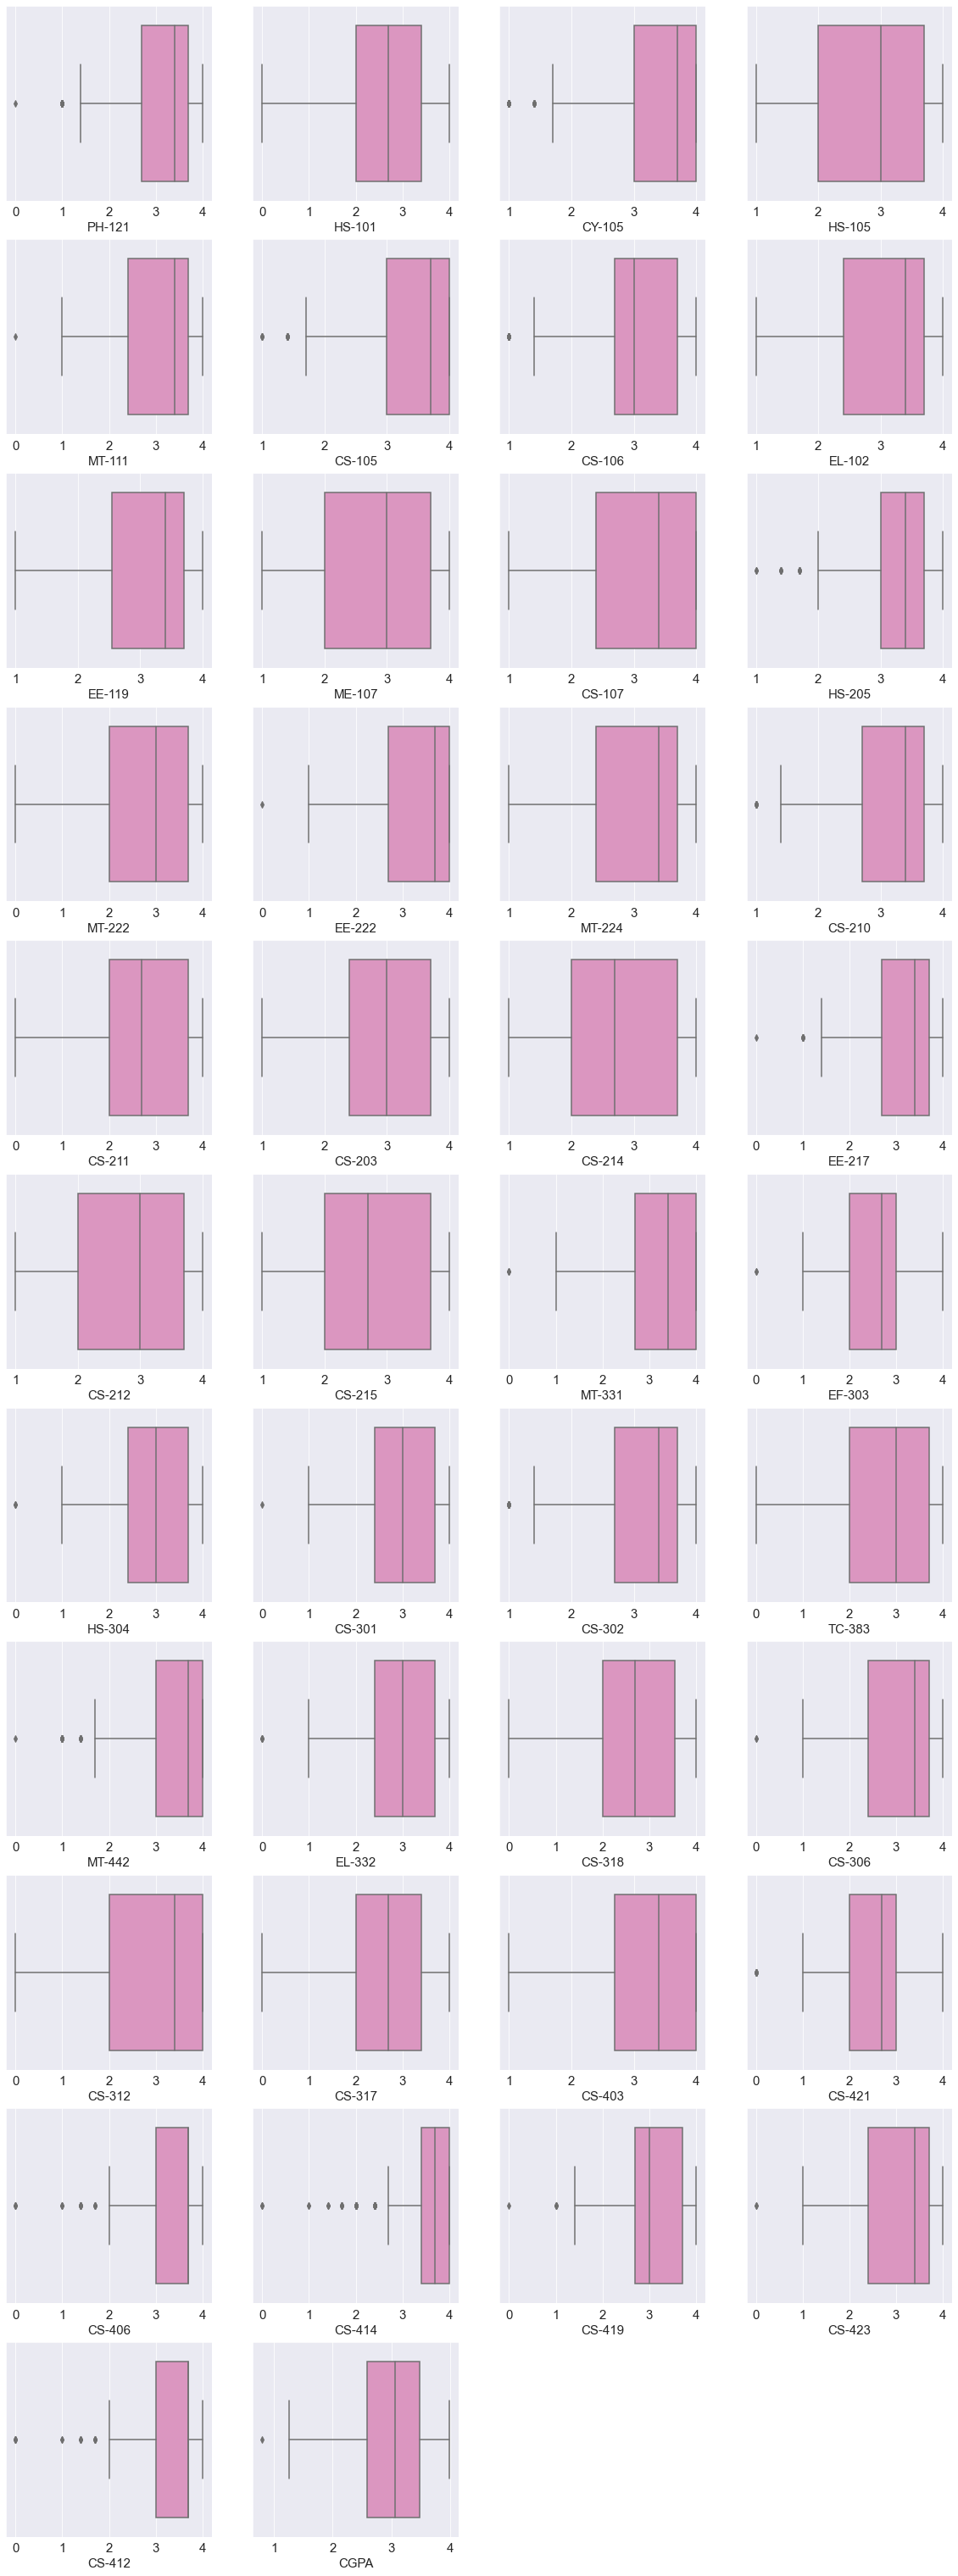

In [281]:
# Checking the outliers by plotting boxplot

plt.figure(figsize=(20,60))
p=1
for i in data:
    if p<=45:
        plt.subplot(12,4,p)
        sns.boxplot(data[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1

plt.show()

The boxplots show that in most of the features there are no outliers.

In [283]:
data.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [285]:
# Check outliers using the Z-score method

from scipy.stats import zscore

out_features=data[data.columns]
z=np.abs(zscore(out_features))
z
#z=pd.DataFrame(z)
#df
#z

array([[0.39291375, 1.40133057, 1.84540702, ..., 0.01233616, 0.52380931,
        1.34682815],
       [0.9964496 , 1.84692151, 2.18925997, ..., 1.17576358, 0.50263176,
        1.68251807],
       [0.9964496 , 0.38103321, 0.79079892, ..., 0.80206304, 0.96371263,
        1.04389757],
       ...,
       [0.07229144, 1.49501057, 0.44694597, ..., 0.80206304, 0.52380931,
        0.80874422],
       [0.9964496 , 0.82662415, 2.64773056, ..., 0.36136439, 1.96897616,
        1.36727626],
       [1.14103248, 1.84692151, 2.64773056, ..., 2.33919101, 2.40887948,
        2.11704057]])

In [287]:
# Threshold=3
np.where(z>3)

(array([ 56,  83,  84,  84,  84,  84,  84,  84,  88,  98,  98,  98, 135,
        180, 192, 204, 211, 257, 269, 275, 307, 311, 313, 315, 371, 371,
        371, 376, 376, 376, 386, 386, 399, 432, 432, 432, 440, 441, 485,
        488, 491, 491, 494, 494, 494, 494, 494, 494, 499, 499, 499, 499,
        504, 504, 526, 526, 526, 526, 526, 531, 533, 533, 534, 536, 536,
        539, 541, 541, 545, 546, 546, 546], dtype=int64),
 array([11,  5,  4,  5, 19, 22, 25, 27,  5,  5, 11, 36,  5, 11, 11, 11, 11,
        11, 11, 22, 11,  5, 11,  5, 24, 29, 37, 33, 37, 40, 22, 28, 37, 29,
        36, 40, 40, 36, 11, 36, 36, 40, 29, 31, 33, 36, 39, 40, 24, 33, 36,
        40, 37, 40, 23, 31, 37, 39, 40, 29, 13, 37, 37, 23, 37, 38,  0, 41,
        36, 24, 29, 36], dtype=int64))

In [288]:
# Now removing the data above Z-Score (outliers) and creating new DF.
# We have to remove the same row number from your target variable, otherwise error due to inconsistency will be present 

data1=data[(z<3).all(axis=1)]
data1.shape

(508, 42)

In [290]:
# Shape of Old and New DataFrame
print("Old DataFrame - ",data.shape[0])
print("New DataFrame - ",data1.shape[0])

Old DataFrame -  547
New DataFrame -  508


In [292]:
print("Data Loss Percentage - ",((data.shape[0]-data.shape[0])/data.shape[0]*100))

Data Loss Percentage -  0.0


### Correlation

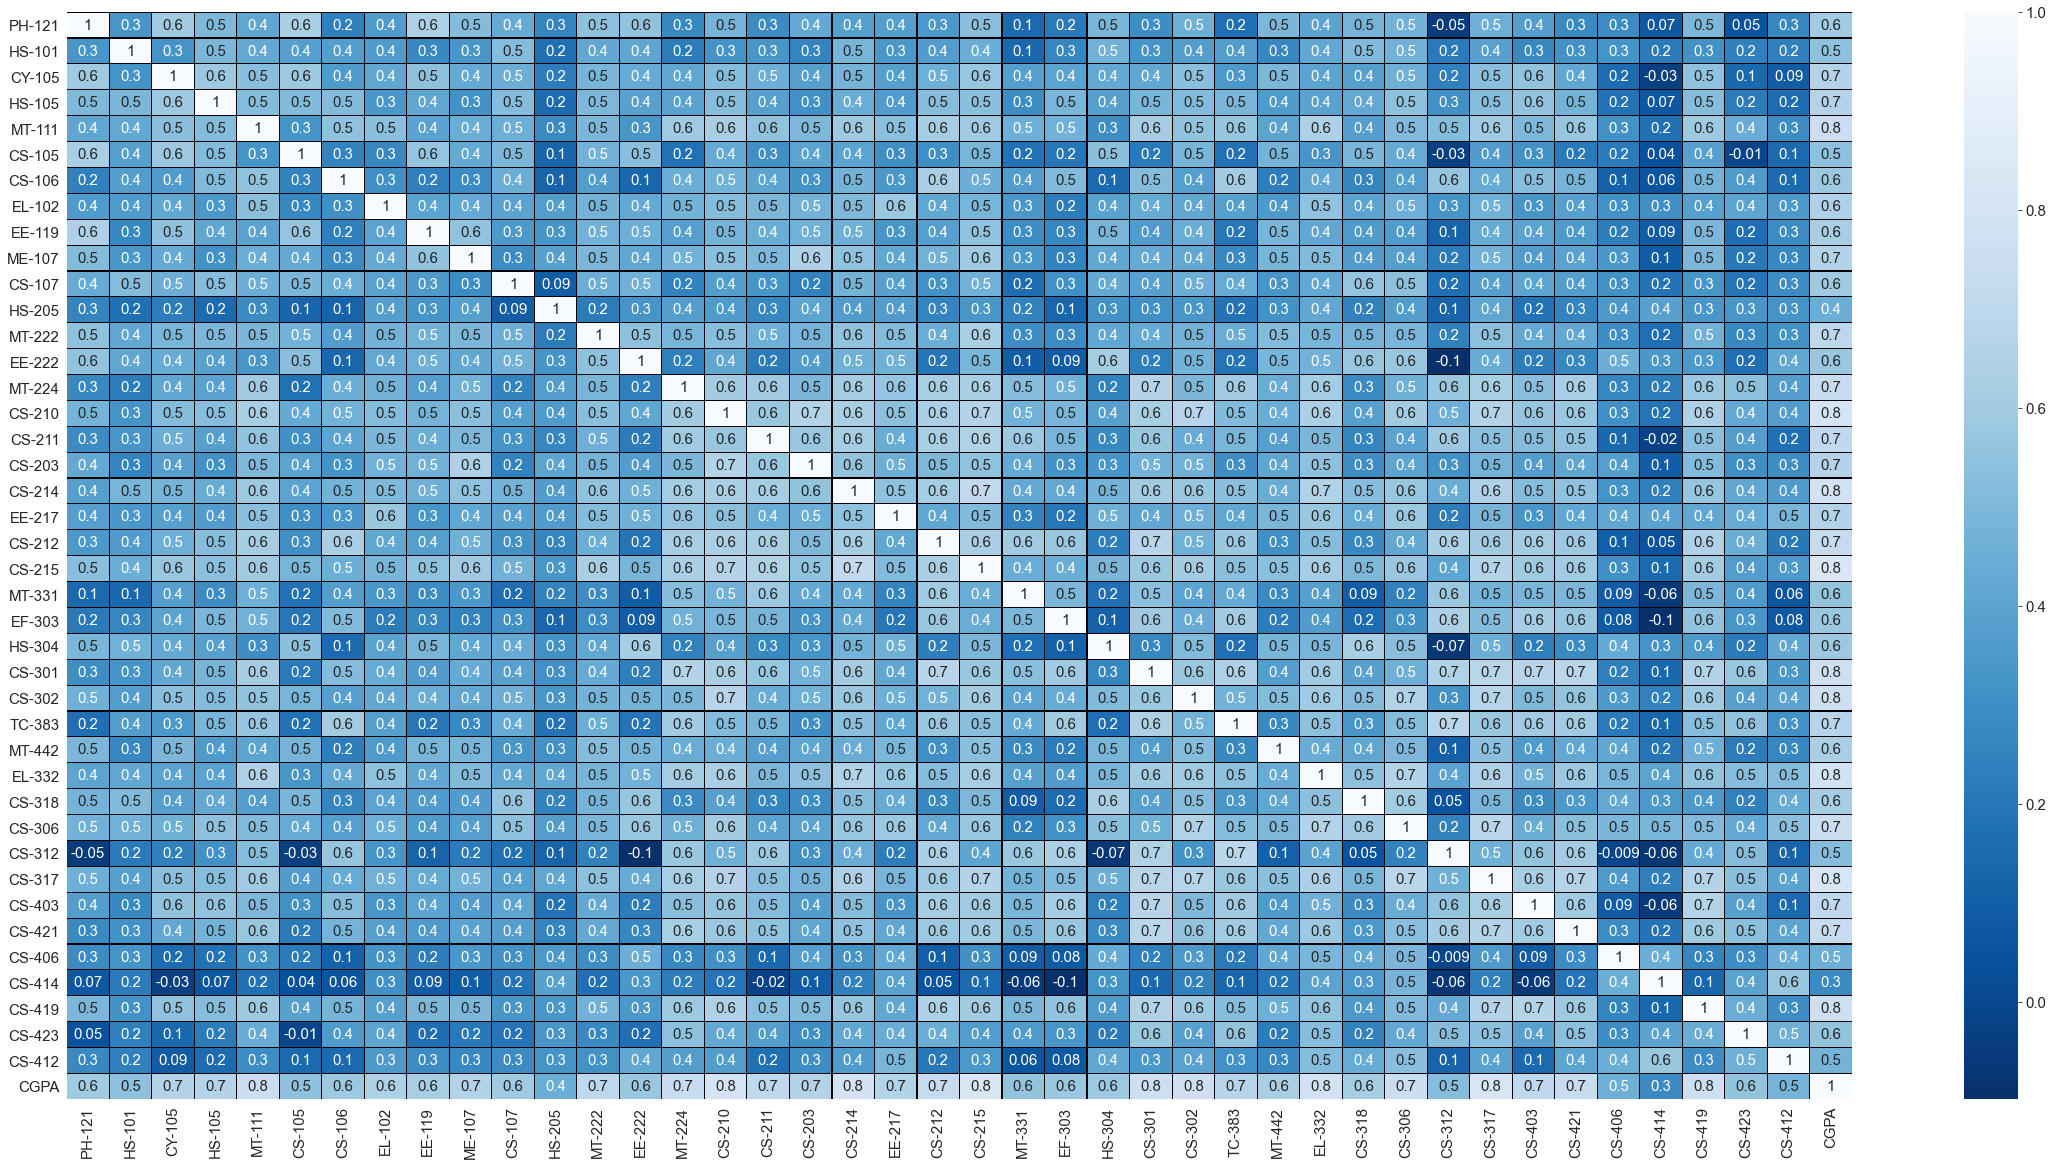

In [308]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(40,20))
sns.heatmap(data1.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [309]:
# How are features correlated with the target variable "CGPA"

data.corr()['CGPA'].sort_values()

CS-414    0.370553
HS-205    0.470703
CS-406    0.494329
CS-412    0.495348
CS-312    0.534566
MT-331    0.550261
HS-101    0.556404
CS-423    0.565454
EF-303    0.568559
EE-222    0.580533
CS-105    0.588444
CS-106    0.597217
CS-107    0.601477
CS-318    0.603264
HS-304    0.608500
MT-442    0.626249
CS-403    0.639654
PH-121    0.645401
EE-119    0.647128
EL-102    0.651206
TC-383    0.655092
ME-107    0.659035
HS-105    0.660944
CS-203    0.662619
CY-105    0.669354
CS-211    0.669835
MT-222    0.680591
EE-217    0.699407
CS-212    0.706259
CS-419    0.711185
MT-224    0.722883
CS-421    0.728702
MT-111    0.738479
CS-301    0.755949
CS-302    0.756661
CS-306    0.758919
CS-215    0.780897
CS-214    0.782109
EL-332    0.784013
CS-210    0.799214
CS-317    0.814143
CGPA      1.000000
Name: CGPA, dtype: float64

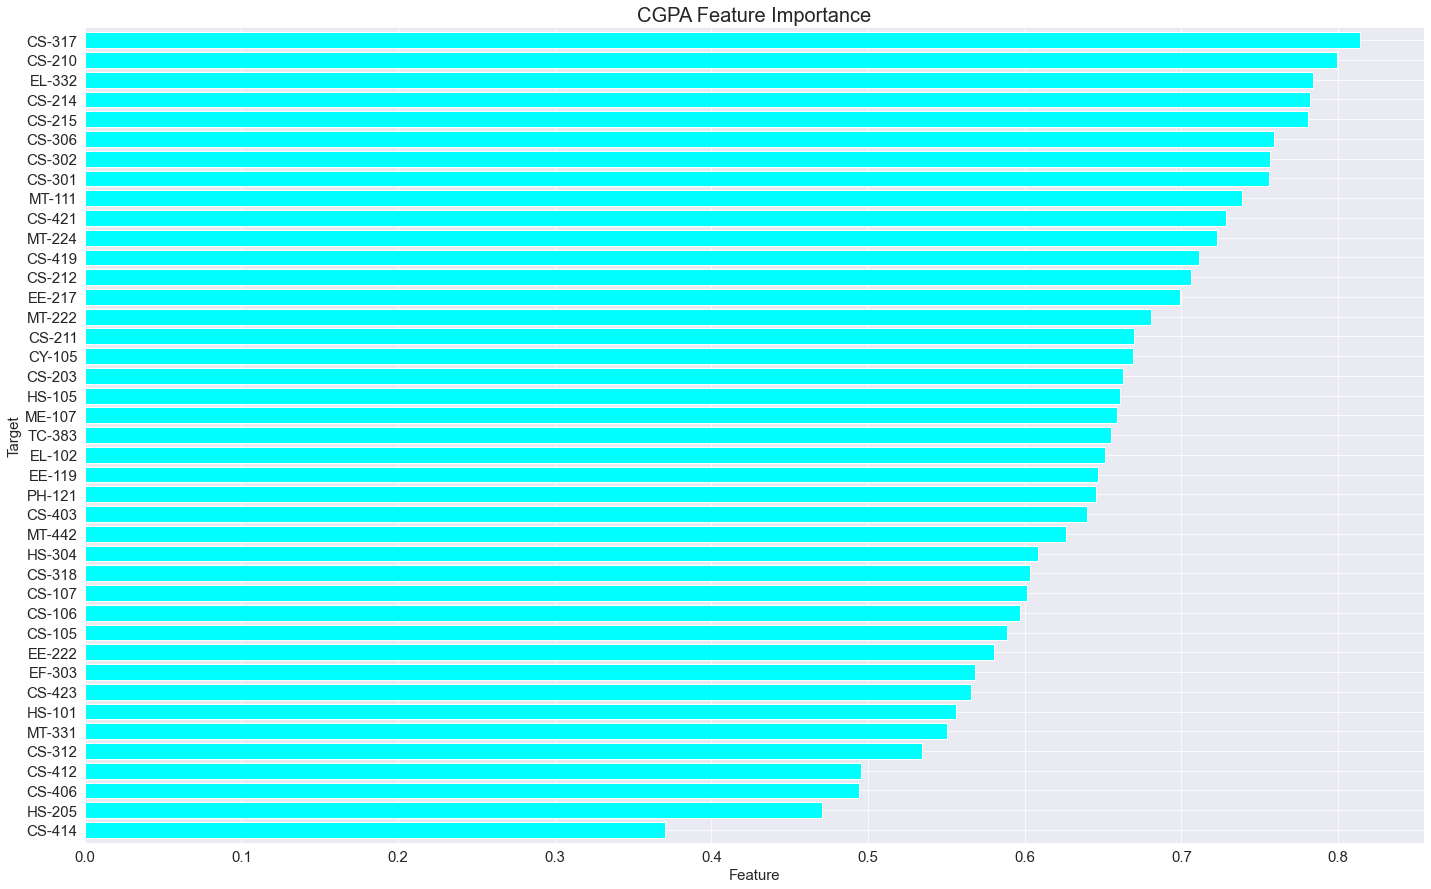

In [311]:
# Visualize correlations of charges by feature importance

plt.figure(figsize=(24,15))
data.corr()['CGPA'].sort_values().drop(['CGPA']).plot(kind='barh',color='aqua',width=0.8)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('CGPA Feature Importance',fontsize=20)
plt.show()

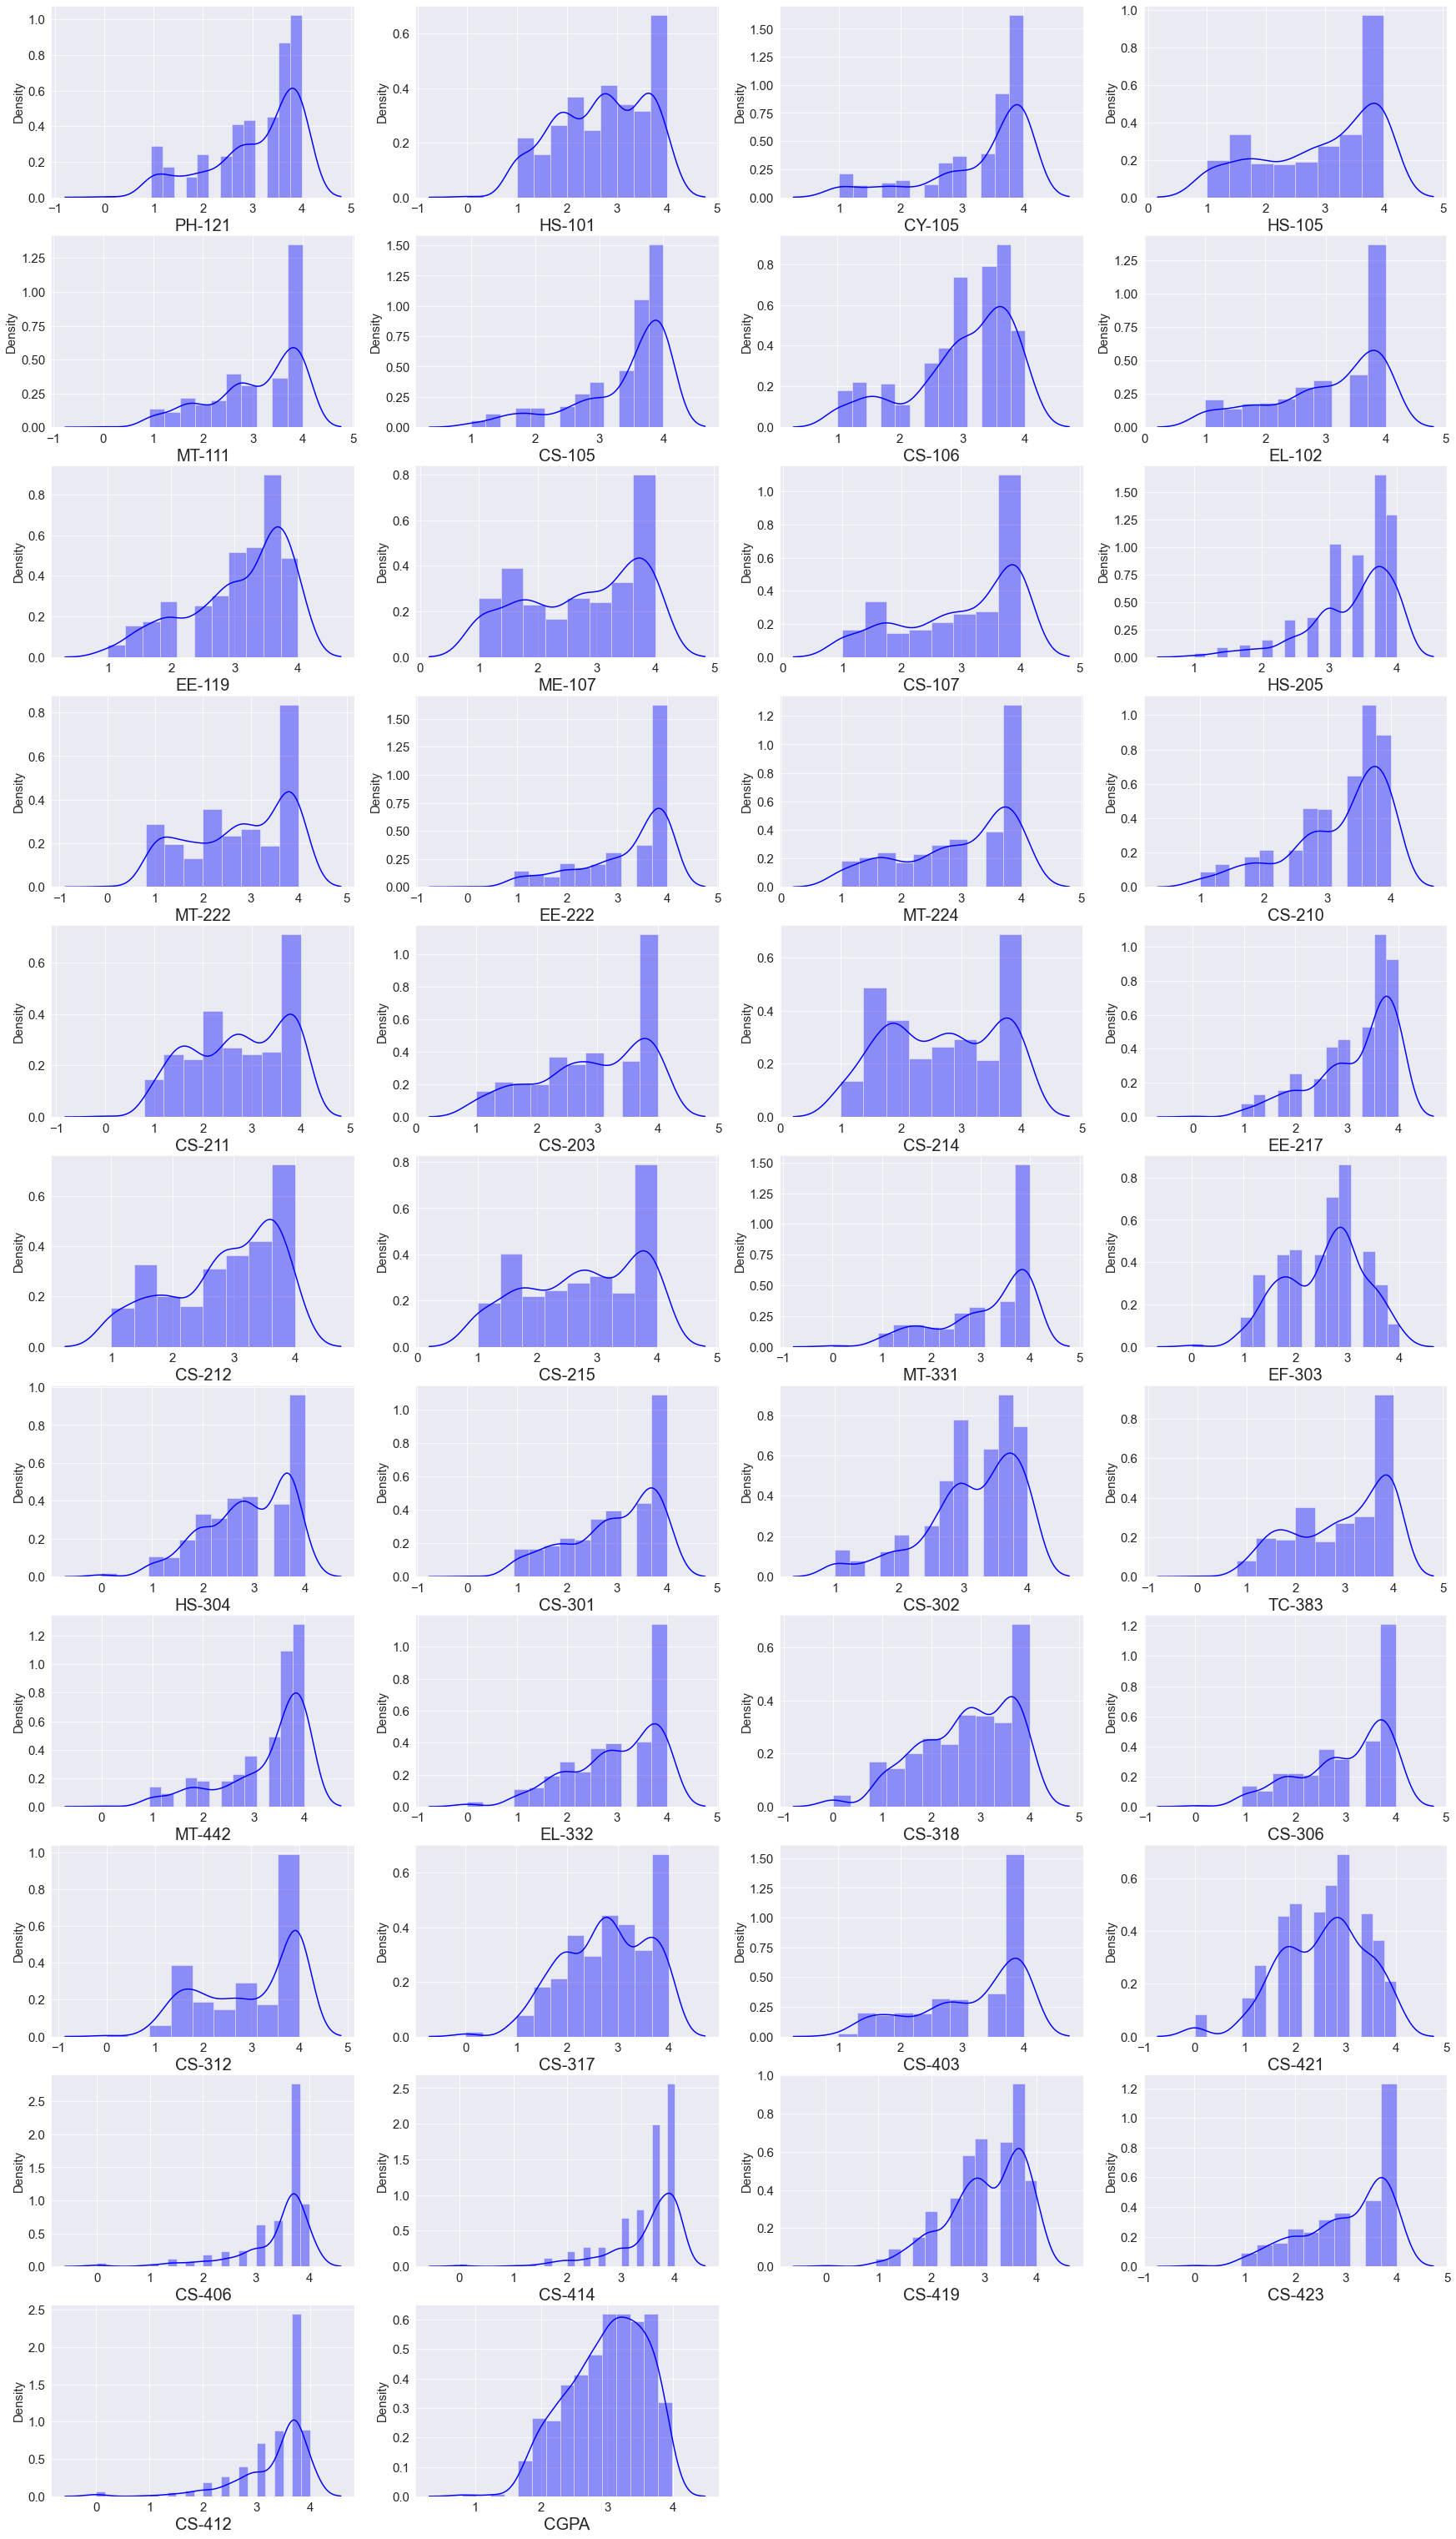

In [301]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(30,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=45:
        ax=plt.subplot(12,4,plotnumber)
        sns.distplot(data[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As shown by the data description, the data is left-skewed. The majority of students have higher grades in each assignment.

### Checking for skewness

In [302]:
data.skew()

PH-121   -0.913474
HS-101   -0.260073
CY-105   -1.344620
HS-105   -0.563794
MT-111   -0.779360
CS-105   -1.322190
CS-106   -0.902728
EL-102   -0.768397
EE-119   -0.772804
ME-107   -0.354597
CS-107   -0.645613
HS-205   -1.198672
MT-222   -0.379749
EE-222   -1.070221
MT-224   -0.641933
CS-210   -1.002362
CS-211   -0.260798
CS-203   -0.487893
CS-214   -0.082832
EE-217   -1.017358
CS-212   -0.591061
CS-215   -0.306944
MT-331   -0.935467
EF-303   -0.301034
HS-304   -0.648938
CS-301   -0.673505
CS-302   -0.974971
TC-383   -0.543103
MT-442   -1.286879
EL-332   -0.764509
CS-318   -0.575936
CS-306   -0.765317
CS-312   -0.515075
CS-317   -0.320288
CS-403   -0.753622
CS-421   -0.454525
CS-406   -2.116942
CS-414   -1.971622
CS-419   -0.756138
CS-423   -0.786411
CS-412   -2.069588
CGPA     -0.428093
dtype: float64

I will not remove the skewness in data since all features are moderate to highly positive correlated with target variable.

## Separating features and label

In [312]:
# Separating the independent and target variables into x and y

x=data.drop("CGPA",axis=1)
y=data["CGPA"]

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (547, 41)
Label Dimension (547,)


## Feature Scaling using Standard Scalarization

In [313]:
# We apply this method to overcome the issue of bias

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.392914,-1.401331,-1.845407,-0.927884,-1.504832,-2.572347,-2.421491,-1.420098,-0.453001,-1.056248,...,-1.112315,-1.261231,-1.236894,-1.687370,-0.988294,0.464315,0.770288,-1.887636,-0.012336,0.523809
1,0.996450,-1.846922,-2.189260,-1.940155,-0.387797,-1.787588,-2.421491,1.054452,-2.084861,-1.759984,...,-2.242188,-1.557704,-2.065892,-1.335933,-1.797744,0.464315,-1.197211,-1.471010,-1.175764,-0.502632
2,0.996450,0.381033,0.790799,-0.219295,0.394128,0.828278,-0.364164,0.408917,0.802276,0.954427,...,0.808468,0.023487,0.302674,1.006982,-0.641387,0.890457,0.770288,1.306493,0.802063,0.963713
3,-2.209774,-0.287353,-2.189260,-1.940155,-2.286756,0.435898,-1.937414,-1.420098,-2.586972,-0.352511,...,-1.451277,-1.557704,-0.881609,-2.038807,-0.988294,-0.956157,-0.743173,-0.915510,-0.710393,-1.382438
4,0.675827,1.160817,0.446946,0.489295,1.064348,0.828278,0.846029,0.408917,1.178859,0.954427,...,0.808468,-0.272987,0.776387,0.304108,0.168063,0.464315,0.770288,0.889867,0.802063,0.963713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.072291,1.495011,0.790799,0.792976,1.064348,0.828278,0.846029,0.731685,1.178859,0.652826,...,0.469506,0.715258,1.131672,1.006982,1.671327,0.890457,-0.137788,0.473242,-0.012336,0.963713
543,0.996450,1.495011,0.790799,1.096658,1.064348,0.828278,1.209086,0.731685,1.178859,1.256029,...,0.808468,0.418784,0.776387,1.006982,1.671327,0.464315,-0.743173,0.889867,-1.175764,0.523809
544,-0.072291,1.495011,0.446946,0.489295,1.064348,0.828278,1.209086,1.054452,1.178859,0.250691,...,0.469506,0.715258,0.302674,1.006982,0.977513,0.890457,-2.256633,0.473242,0.802063,0.523809
545,0.996450,0.826624,-2.647731,1.096658,-2.286756,-2.572347,-0.364164,-1.420098,-0.453001,-1.056248,...,0.469506,-1.953002,0.302674,-0.164475,-0.988294,-3.370961,-2.256633,-0.082259,-0.361364,-1.968976


## Checking Variance Inflation Factor (VIF)

In [314]:
# Finding VIF in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF Values,Features
0,3.251516,PH-121
1,1.970505,HS-101
2,2.779467,CY-105
3,2.645321,HS-105
4,2.836726,MT-111
5,2.703330,CS-105
6,2.307343,CS-106
7,2.255205,EL-102
8,2.576580,EE-119
9,2.412805,ME-107


All VIF values are between 1 to 5, which shows that variables are moderately correlated. But, given that the values are not greater than 10, I will not apply any corrections, like dropping any feature.

### Finding the best random state

In [316]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

### Creating train test split

In [317]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximun r2 score is ",maxAccu, "on random_state",maxRS)

Maximun r2 score is  0.9879595594919518 on random_state 46


In [318]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### Algorithms

In [319]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR

In [320]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
LR_r=r2_score(y_test,pred_LR)
LR_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',LR_r)
print('R2 Score on training data:',LR_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score: 0.9879595594919518
R2 Score on training data: 95.96991745308205
Mean Absolute Error: 0.0533860880498498
Mean Squared Error: 0.004641060679511576
Root Mean Squared Error: 0.06812533067451178


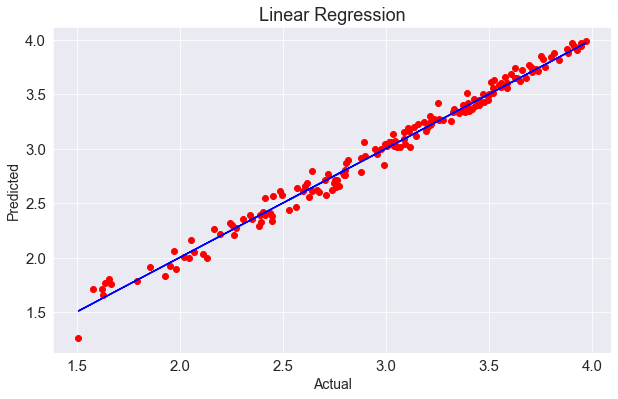

In [321]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [322]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
RFR_r=r2_score(y_test,pred_RFR)
RFR_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',RFR_r)
print('R2 Score on training data:',RFR_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score: 0.9428954808269898
R2 Score on training data: 98.7016024665807
Mean Absolute Error: 0.10266927272727248
Mean Squared Error: 0.022011282592121165
Root Mean Squared Error: 0.1483619984771072


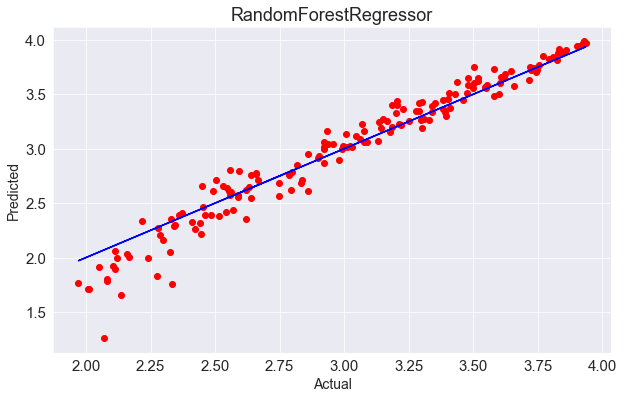

In [323]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_test,color='r')
plt.plot(pred_RFR,pred_RFR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("RandomForestRegressor",fontsize=18)
plt.show()

In [324]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
knn_r=r2_score(y_test,pred_knn)
knn_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',knn_r)
print('R2 Score on training data:',knn_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 0.9612771477156449
R2 Score on training data: 94.13757476065409
Mean Absolute Error: 0.09311030303030303
Mean Squared Error: 0.014925957818181821
Root Mean Squared Error: 0.12217183725467101


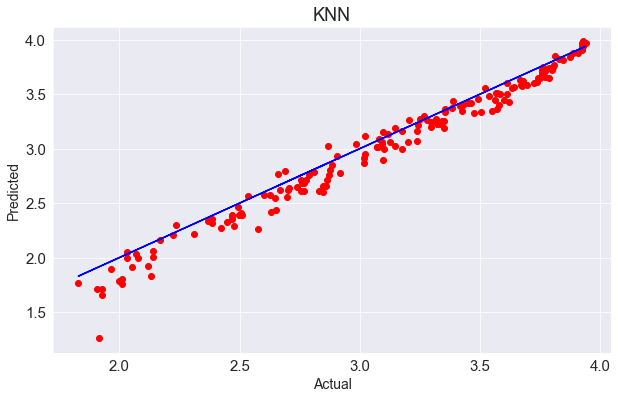

In [325]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_knn,y=y_test,color='r')
plt.plot(pred_knn,pred_knn,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("KNN",fontsize=18)
plt.show()

In [326]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
GBR_r=r2_score(y_test,pred_GBR)
GBR_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',GBR_r)
print('R2 Score on training data:',GBR_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 0.9549060574284982
R2 Score on training data: 99.73541429869485
Mean Absolute Error: 0.09209277010128003
Mean Squared Error: 0.017381733136163726
Root Mean Squared Error: 0.1318398010320242


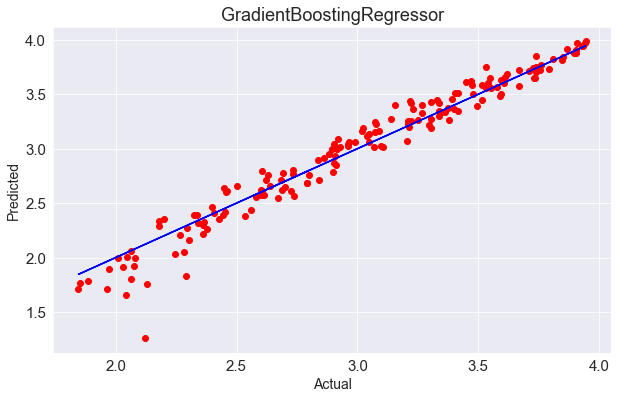

In [327]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_GBR,y=y_test,color='r')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [328]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
lasso_r=r2_score(y_test,pred_lasso)
lasso_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',lasso_r)
print('R2 Score on training data:',lasso_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score: -7.827847309216374e-05
R2 Score on training data: 0.0
Mean Absolute Error: 0.5223634935744883
Mean Squared Error: 0.3854862263181
Root Mean Squared Error: 0.6208753710029896


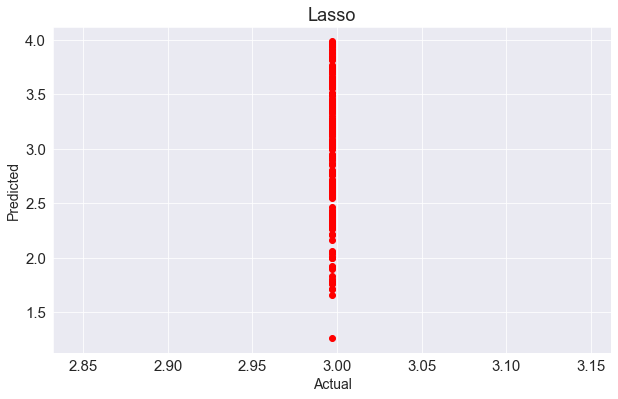

In [329]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lasso,y=y_test,color='r')
plt.plot(pred_lasso,pred_lasso,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Lasso",fontsize=18)
plt.show()

In [330]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_ridge=rd.predict(x_test)
pred_train=rd.predict(x_train)
ridge_r=r2_score(y_test,pred_ridge)
ridge_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',ridge_r)
print('R2 Score on training data:',ridge_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score: 0.9880807007150397
R2 Score on training data: 95.96982532720045
Mean Absolute Error: 0.05306878979681955
Mean Squared Error: 0.004594366061755239
Root Mean Squared Error: 0.06778175316230202


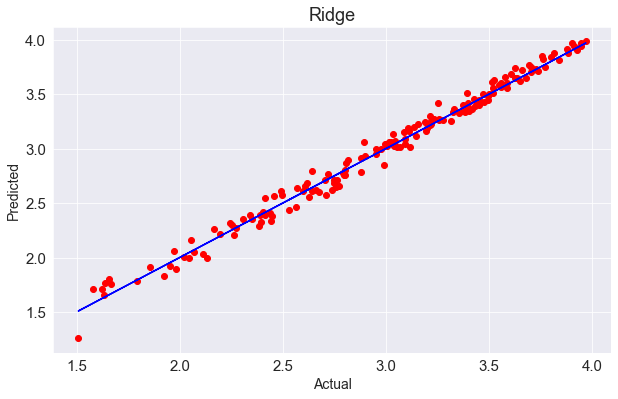

In [331]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_ridge,y=y_test,color='r')
plt.plot(pred_ridge,pred_ridge,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Ridge",fontsize=18)
plt.show()

In [332]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
dtr_r=r2_score(y_test,pred_DTR)
dtr_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',dtr_r)
print('R2 Score on training data:',dtr_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score: 0.8308208977014356
R2 Score on training data: 100.0
Mean Absolute Error: 0.17158181818181814
Mean Squared Error: 0.06521110909090909
Root Mean Squared Error: 0.2553646590484069


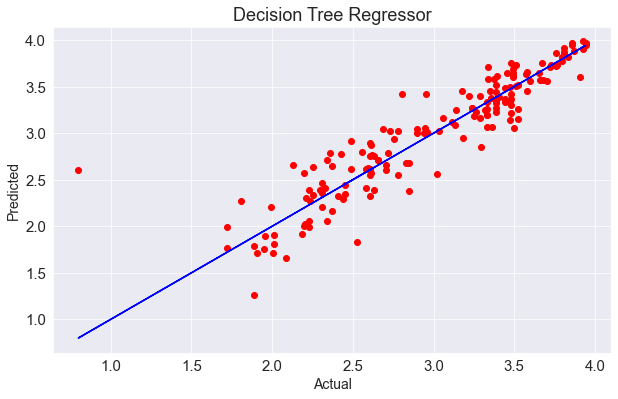

In [333]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_DTR,y=y_test,color='r')
plt.plot(pred_DTR,pred_DTR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Decision Tree Regressor",fontsize=18)
plt.show()

In [334]:
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
svr_r=r2_score(y_test,pred_SVR)
svr_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',svr_r)
print('R2 Score on training data:',svr_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2 Score: 0.9478849312772742
R2 Score on training data: 97.54000373423335
Mean Absolute Error: 0.08813042026002207
Mean Squared Error: 0.020088068712885793
Root Mean Squared Error: 0.14173238413603925


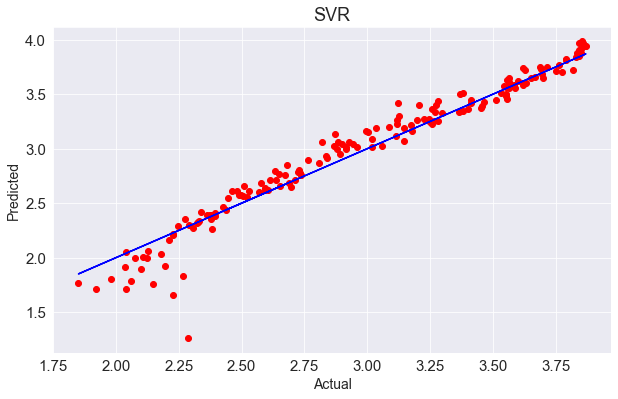

In [335]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_SVR,y=y_test,color='r')
plt.plot(pred_SVR,pred_SVR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("SVR",fontsize=18)
plt.show()

In [336]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
etr_r=r2_score(y_test,pred_ETR)
etr_rtd=r2_score(y_train, pred_train)*100

print('R2 Score:',etr_r)
print('R2 Score on training data:',etr_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2 Score: 0.9571281965758548
R2 Score on training data: 100.0
Mean Absolute Error: 0.08954327272727239
Mean Squared Error: 0.016525196150302953
Root Mean Squared Error: 0.12855036425581592


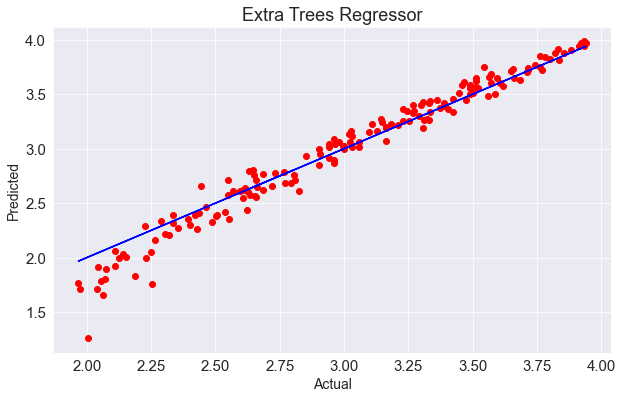

In [337]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_ETR,y=y_test,color='r')
plt.plot(pred_ETR,pred_ETR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Extra Trees Regressor",fontsize=18)
plt.show()

In [338]:
# Checking all algorithm results

results_alg=pd.DataFrame({'Model':['LinearRegression','RandomForestRegressor','KNeighborsRegressor','GradientBoostingRegressor',
'Lasso','Ridge','DecisionTreeRegressor','SVR','ExtraTreesRegressor'],'R2 Score':[LR_r,RFR_r,knn_r,GBR_r,lasso_r,ridge_r,dtr_r,svr_r,etr_r],'R2 Score on Training Data':[LR_rtd,RFR_rtd,knn_rtd,GBR_rtd,lasso_rtd,ridge_rtd,dtr_rtd,svr_rtd,etr_rtd]})
results_alg.index+=1
results_alg

,Model,R2 Score,R2 Score on Training Data
1,LinearRegression,0.987960,95.969917
2,RandomForestRegressor,0.942895,98.701602
3,KNeighborsRegressor,0.961277,94.137575
4,GradientBoostingRegressor,0.954906,99.735414
5,Lasso,-0.000078,0.000000
6,Ridge,0.988081,95.969825
7,DecisionTreeRegressor,0.830821,100.000000
8,SVR,0.947885,97.540004
9,ExtraTreesRegressor,0.957128,100.000000


There is evidence of overfitting.

### Cross Validation Score

In [339]:
from sklearn.model_selection import cross_val_score

In [340]:
# Checking CV Score
score=cross_val_score(LR,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.97354315 0.98463555 0.96961757 0.98691233 0.83278309]
0.94949833948613
Difference between R2 Score and Cross Validation Score is 3.846122000582175


In [341]:
# Checking CV Score
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.93952608 0.95104738 0.95654293 0.95081521 0.78666662]
0.9169196457322194
Difference between R2 Score and Cross Validation Score is 2.5975835094770416


In [342]:
# Checking CV Score
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.96603093 0.95945519 0.95125061 0.95529198 0.78690737]
0.9237872149257298
Difference between R2 Score and Cross Validation Score is 3.748993278991508


In [343]:
# Checking CV Score
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.95890335 0.97078457 0.95864281 0.94968446 0.79466799]
0.9265366344949539
Difference between R2 Score and Cross Validation Score is 2.8369422933544275


In [344]:
# Checking CV Score
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[-0.00804619 -0.01765288 -0.00096645 -0.0095442  -0.025866  ]
-0.012415142602343198
Difference between R2 Score and Cross Validation Score is 1.2336864129251035


In [345]:
# Checking CV Score
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_ridge)-score5.mean())*100)

[0.97379509 0.98477567 0.96985065 0.98707512 0.83289696]
0.9496786984272975
Difference between R2 Score and Cross Validation Score is 3.8402002287742265


In [346]:
# Checking CV Score
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_DTR)-score6.mean())*100)

[0.42794174 0.73941586 0.7383655  0.7817648  0.72859887]
0.6832173558319202
Difference between R2 Score and Cross Validation Score is 14.760354186951542


In [347]:
# Checking CV Score
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_SVR)-score7.mean())*100)

[0.94491165 0.97654308 0.96808105 0.96160496 0.85787987]
0.9418041226667574
Difference between R2 Score and Cross Validation Score is 0.6080808610516852


In [348]:
# Checking CV Score
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_ETR)-score8.mean())*100)

[0.9586408  0.96172768 0.95948749 0.96122176 0.79017964]
0.9262514750527933
Difference between R2 Score and Cross Validation Score is 3.0876721523061534


Support Vector Regression (SVR) is our best model as the difference between Accuracy Score and Cross Validation is least.

## Hyperparameter Tuning

In [352]:
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [353]:
# To increase the performance of the model
# Support Vector Classifier (SVC)

from sklearn.model_selection import GridSearchCV

# Always take at least 5 parameters
parameters={'C':[0.1,1,100,1000], 'kernel':['rbf','poly','sigmoid','linear'], 'degree':[1,2,3,4,5,6]}

In [354]:
gscv=GridSearchCV(SVR(),parameters,cv=5)

In [355]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [356]:
gscv.best_params_

{'C': 0.1, 'degree': 1, 'kernel': 'poly'}

In [364]:
Model=SVR(C=0.1, degree=1, kernel='poly')

In [368]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.9879305389869291
Mean Absolute Error: 0.05377236810938969
Mean Squared Error: 0.0046522468088455084
Root Mean Squared Error: 0.06820738089712512


## Saving the Model

In [369]:
# Saving the model using .pkl
import pickle
filename="Students Grades Prediction.pkl"
pickle.dump(Model,open(filename,'wb'))

In [370]:
import pickle
loaded_model=pickle.load(open("Students Grades Prediction.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.7930538986929


## Get Predictions

In [371]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
Predicted,2.581409,2.73749,3.149344,2.539001,2.615264,2.502025,3.753319,3.536827,2.718983,3.000991,...,3.677962,3.806254,3.248637,3.682583,3.497718,2.86437,2.768463,3.400477,2.413226,2.817338
Original,2.440000,2.68100,3.195000,2.548000,2.612000,2.462000,3.856000,3.605000,2.648000,3.014000,...,3.772000,3.882000,3.261000,3.754000,3.566000,2.87000,2.775000,3.404000,2.321000,2.756000
